In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

raw = pd.read_csv('../../../../datasets/paris_listings.csv')
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']!=0]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 
df = df.dropna()

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 58744
숙소_유형 제거 : 41106
12개월_리뷰수 0개 제거 : 36676


In [125]:
df.isnull().sum()

숙소_id          0
호스트_id         0
슈퍼호스트          0
숙소_수           0
숙소_지역          0
숙소_유형          0
수용_인원수         0
욕실수            0
침실수            0
침대수            0
편의시설           0
숙소_가격          0
최소_숙박일         0
최대_숙박일         0
리뷰수            0
30일_리뷰수        0
리뷰점수           0
숙소_정확성_리뷰점수    0
숙소_청결도_리뷰점수    0
숙소_체크인_리뷰점수    0
숙소_소통_리뷰점수     0
숙소_위치_리뷰점수     0
숙소_가격_리뷰점수     0
평균_리뷰수         0
url            0
숙소_특징          0
12개월_리뷰수       0
dtype: int64

In [126]:
len(raw[raw['host_is_superhost']=='t'])

13379

# 슈퍼호스트 리뷰값 확인

In [127]:
df[df['리뷰수']==1]['리뷰점수']

63       4.0
1190     5.0
1499     5.0
1765     5.0
2743     5.0
        ... 
83270    5.0
83437    5.0
83589    5.0
83687    5.0
84153    5.0
Name: 리뷰점수, Length: 3265, dtype: float64

In [128]:
print(len(df[df['슈퍼호스트']=='t']))
df = df[df['qw']!=0]
print(len(df[df['슈퍼호스트']=='t']))

10464


KeyError: 'qw'

In [ ]:
check2 = df[df['슈퍼호스트']=='t']
df['슈퍼호스트'] = df['슈퍼호스트'].map({'t': 1, 'f': 0})

len(check2)

10465

In [ ]:

print(len(check2))
print(check2[check2['리뷰수']<20]['리뷰수'].value_counts().sort_index())
print(check2[check2['리뷰수']<20]['리뷰수'].value_counts().sum())

check2 = check2[check2['리뷰수']>2]

10465
리뷰수
1     215
2     206
3     188
4     162
5     160
6     132
7     152
8     191
9     215
10    214
11    208
12    216
13    221
14    208
15    231
16    215
17    196
18    207
19    185
Name: count, dtype: int64
3722


# 상관관계 분석

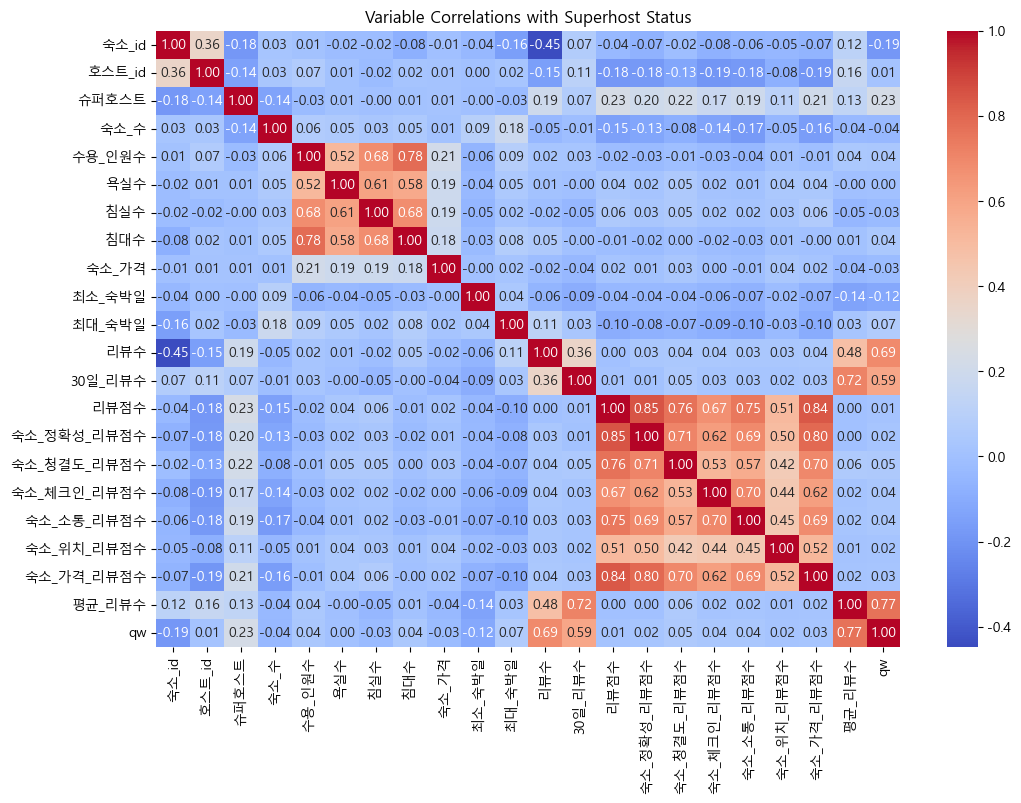

In [ ]:
# 숫자형 변수만 선택
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# 슈퍼호스트 변수와 숫자형 변수 간의 상관계수 계산
correlation_matrix = numeric_data.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Correlations with Superhost Status')
plt.show()


In [ ]:
check2['리뷰수'].value_counts().sort_index()

리뷰수
3       188
4       162
5       160
6       132
7       152
       ... 
730       1
836       1
933       1
1091      1
2905      1
Name: count, Length: 442, dtype: int64

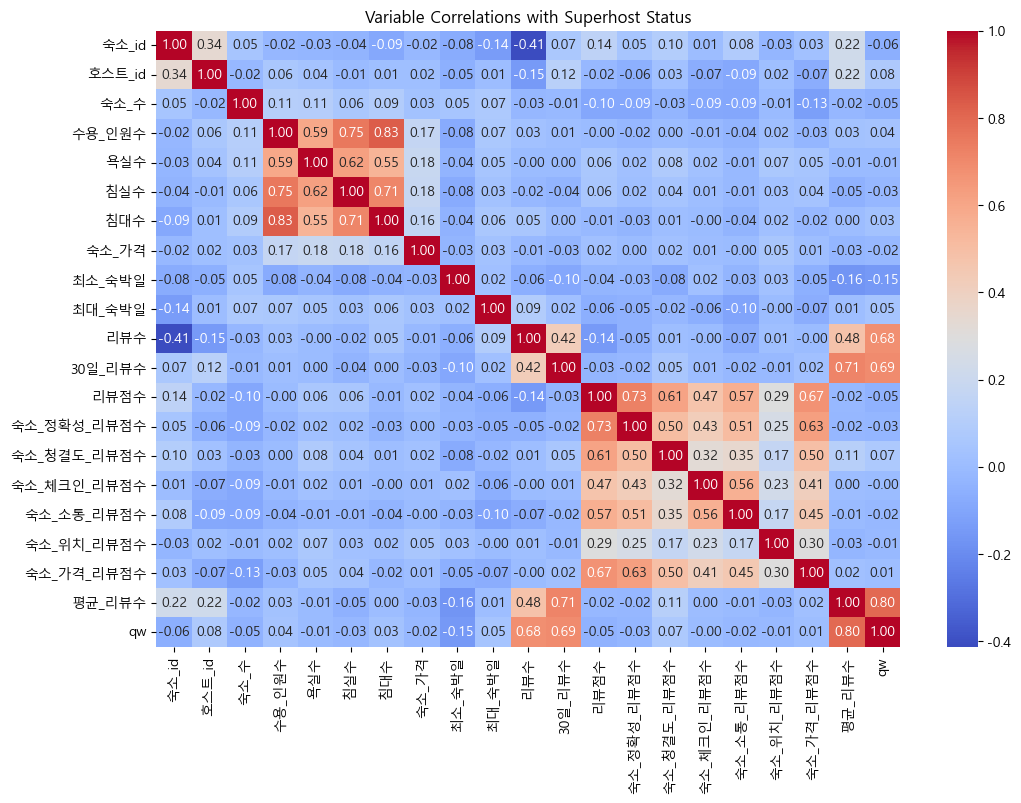

In [ ]:
# 숫자형 변수만 선택
numeric_data = check2.select_dtypes(include=['int64', 'float64'])

# 슈퍼호스트 변수와 숫자형 변수 간의 상관계수 계산
correlation_matrix = numeric_data.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Correlations with Superhost Status')
plt.show()


In [134]:
check1['리뷰수'].value_counts()
check1['리뷰수'].unique()

array([ 106,  393,   78,  348,  111,  177,   86,  206,   24,  461,   64,
         75,   59,  141,  185,   49,   52,  287,   22,  210,   39,   35,
         30,  669,    9,   62,  171,  120,  121,   21,  137,  100,  230,
          1,   98,  250,   23,  186,  314,  165,  151,   46,  133,  249,
        158,  202,   37,  294,   34,  116,  277,  144,  453,   85,   82,
         10,  267,   40,  123,    8,  253,  285,  126,  209,  124,  119,
         96,   92,   27,    7,   42,   67,  127,   41,  132,  245,  166,
         56,  371,  114,  143,  419,   29,   47,  836,  307,   83,  554,
        227,  176,   20,   88,   51,  135,  162,  161,  345,  224,   77,
        242,  303,   70,   15,   31,  300,   90,    6,  163,   87,  105,
        262,  269,  211,   58,  424,  560,  156,  297,   13,   50,  216,
        219,   19,  150,   12,   44,   38,  122,    4,  422,  125,   45,
        323,   84,   61,   53,   60,  109,   71,   26,  233,  520,  108,
        498,   81,   33,   11,  195,  192,  201,   

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 범주형 변수 선택
categorical_features = df.select_dtypes(include=['object']).columns

# 숫자형 변수 선택 (슈퍼호스트 제외)
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['슈퍼호스트']).columns

# 원-핫 인코더와 파이프라인 설정
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 로지스틱 회귀 모델 파이프라인 구축
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

# 데이터 준비
X = df.drop('슈퍼호스트', axis=1)  # 독립변수
y = df['슈퍼호스트']  # 종속변수

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인을 이용한 모델 학습
clf.fit(X_train, y_train)

# 모델 평가
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

# 계수 출력 (원-핫 인코딩된 변수 포함)
if hasattr(clf.named_steps['classifier'], 'coef_'):
    coefs = pd.DataFrame(
        clf.named_steps['classifier'].coef_[0],
        index=preprocessor.transformers_[1][1].get_feature_names_out(categorical_features),
        columns=['Coefficients']
    )
    print(coefs.sort_values(by='Coefficients', ascending=False))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

- 슈퍼 호스트인데 리뷰수 1~10

In [ ]:
df[df['리뷰수']<20]['리뷰수'].value_counts().sort_index()

리뷰수
1     4034
2     2780
3     2288
4     1809
5     1586
6     1280
7     1223
8     1143
9     1052
10     931
11     845
12     793
13     746
14     705
15     677
16     613
17     610
18     599
19     586
Name: count, dtype: int64

In [ ]:
df[df['리뷰수']==1]

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용_인원수,욕실수,침실수,침대수,...,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url,숙소_특징
63,58569,280433,f,13.0,Entrepôt,Entire home/apt,2,1.0,0.0,1.0,...,4.0,5.0,4.0,5.0,5.0,5.0,4.0,0.21,https://www.airbnb.com/rooms/58569,Entire rental unit
78,216546,1117732,f,1.0,Popincourt,Entire home/apt,2,1.0,2.0,2.0,...,0.0,5.0,5.0,5.0,5.0,5.0,5.0,0.01,https://www.airbnb.com/rooms/216546,Entire rental unit
119,81870,152242,f,247.0,Luxembourg,Entire home/apt,2,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.01,https://www.airbnb.com/rooms/81870,Entire rental unit
522,583723,2876549,t,5.0,Popincourt,Entire home/apt,3,1.0,2.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.04,https://www.airbnb.com/rooms/583723,Entire loft
542,652621,1610648,f,1.0,Vaugirard,Entire home/apt,4,1.0,1.0,2.0,...,0.0,5.0,5.0,5.0,5.0,5.0,5.0,0.01,https://www.airbnb.com/rooms/652621,Entire rental unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83437,1107177295207187900,9477606,f,1.0,Luxembourg,Entire home/apt,2,1.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.00,https://www.airbnb.com/rooms/1107177295207187900,Entire rental unit
83589,1108741370485532713,12046468,f,2.0,Temple,Entire home/apt,2,1.0,1.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.00,https://www.airbnb.com/rooms/1108741370485532713,Entire rental unit
83666,1109396868279302811,13944874,f,2.0,Vaugirard,Entire home/apt,4,1.0,2.0,2.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.00,https://www.airbnb.com/rooms/1109396868279302811,Entire rental unit
83687,1109220943409848089,566305275,f,1.0,Entrepôt,Entire home/apt,2,1.0,1.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.00,https://www.airbnb.com/rooms/1109220943409848089,Entire rental unit
